<a href="https://colab.research.google.com/github/SoleEsp/Inmersion_datos_ALURA_LATAM/blob/main/Desafio_clase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafíos

**1- Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)**

**2- Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.**

In [4]:
import pandas as pd

inmuebles_bogota = pd.read_csv('inmuebles_bogota.csv')

In [5]:
inmuebles_bogota.head(10)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000
5,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 510.000.000
6,Apartamento,Apartamento en venta en Bella Suiza,1,2,62,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 500.000.000
7,Apartamento,Apartamento en venta en Bella Suiza,3,4,212,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 2.350.000.000
8,Apartamento,Apartamento en venta en El Chicó,3,2,159,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 850.000.000
9,Apartamento,Apartamento en venta en Bella Suiza,2,2,80,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 642.000.000


In [6]:
inmuebles_bogota = inmuebles_bogota.rename(columns= {'Área' : 'Area'})

In [7]:
valor = inmuebles_bogota.Valor.str.split(expand=True)
inmuebles_bogota['Moneda'] = valor[0]
inmuebles_bogota['Precio'] = valor[1]
inmuebles_bogota.sample(5)

,Tipo,Descripcion,Habitaciones,Baños,Area,Barrio,UPZ,Valor,Moneda,Precio
3030,Casa,Casa en venta en Bosa Piamonte,6,4,400,Bosa Piamonte,Bosa Central,$ 470.000.000,$,470.000.000
3169,Apartamento,Apartamento en venta en Engativa,3,2,62,Engativa,Engativá,$ 274.000.000,$,274.000.000
8537,Casa,Casa en venta en Villa Alsacia,3,2,63,Villa Alsacia,KENNEDY: Castilla + Bavaria,$ 222.000.000,$,222.000.000
7506,Apartamento,Apartamento en venta en Bosa,3,2,52,Bosa,Bosa Central,$ 134.999.998,$,134.999.998
4773,Casa,Casa en venta en Barrios Unidos,3,3,128,Barrios Unidos,Los Andes,$ 311.000.000,$,311.000.000


In [8]:
inmuebles_bogota['Precio'] = inmuebles_bogota['Precio'].str.replace('.','',regex=True)

In [9]:
inmuebles_bogota['Precio_Millon'] = inmuebles_bogota.Precio.astype('float')/1000000
inmuebles_bogota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Baños          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


# Respuesta 1

In [10]:
inmuebles_bogota.Tipo.value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

In [11]:
inmuebles = inmuebles_bogota[inmuebles_bogota['Tipo'].isin(['Casa','Apartamento','Oficina/Consultorio'])]

In [12]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Baños,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
5268,Casa,Casa en venta en Bosa,3,1,47,Bosa,Bosa Central,$ 120.800.000,$,120800000,120.8
1489,Apartamento,Apartamento en venta en Bosa,3,1,43,Bosa,Bosa Central,$ 120.000.000,$,120000000,120.0
4247,Apartamento,Apartamento en venta en Barrancas,3,2,63,Barrancas,San Cristóbal Norte,$ 238.000.000,$,238000000,238.0
6994,Apartamento,Apartamento en venta en Chapinero,3,5,249,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 3.960.000.000,$,3960000000,3960.0
8885,Apartamento,Apartamento en venta en Chapinero,2,1,50,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 175.000.000,$,175000000,175.0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

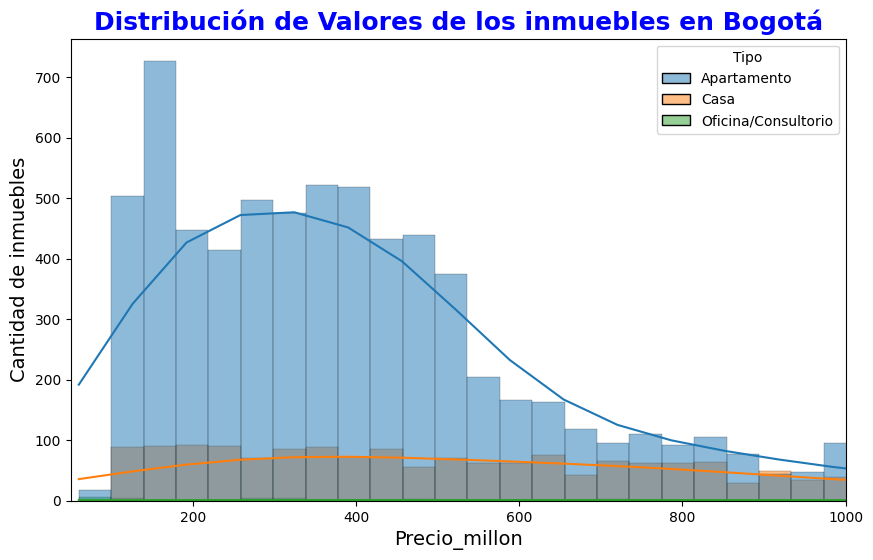

In [19]:
plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue='Tipo')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá', fontsize=18, color='blue',fontweight='bold')
plt.xlim((50,1000))
plt.ylabel('Cantidad de inmuebles', fontsize=14)
plt.xlabel('Precio_millon', fontsize=14)
plt.show()

# Respuesta 2

In [ ]:
inmuebles['Precio_m2'] = inmuebles['Precio_Millon'] / inmuebles['Area'] # calculamos el precio por metro cuadrado en una columna nueva

In [23]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Baños,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon,Precio_m2
900,Casa,Casa en venta en Castilla,3,3,73,Castilla,KENNEDY: Castilla + Bavaria,$ 329.000.000,$,329000000,329.0,4.506849
7582,Casa,Casa en venta en Usaquén,3,4,300,Usaquén,Usaquén,$ 1.850.000.000,$,1850000000,1850.0,6.166667
8119,Apartamento,Apartamento en venta en Kennedy,3,1,68,Kennedy,Kennedy Central,$ 270.000.000,$,270000000,270.0,3.970588
7644,Apartamento,Apartamento en venta en Bosa,3,1,42,Bosa,Bosa Central,$ 110.000.000,$,110000000,110.0,2.619048
6912,Casa,Casa en venta en Bosa,4,2,72,Bosa,Bosa Central,$ 189.000.000,$,189000000,189.0,2.625000


In [47]:
barrios = inmuebles.groupby(['Barrio'])['Precio_m2'].mean().reset_index().head(10) # agrupamos los barrios y obtenemos el promedio de Precio_m2

Text(0.5, 0, 'Precio por metro cuadrado (millones)')

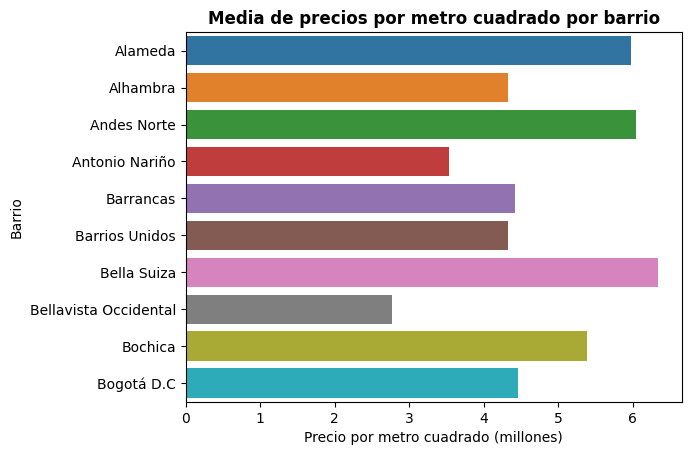

In [59]:
#grafico
sns.barplot(data=barrios, y='Barrio', x='Precio_m2')
plt.title('Media de precios por metro cuadrado por barrio',fontweight='bold')
plt.ylabel('Barrio')
plt.xlabel('Precio por metro cuadrado (millones)')